In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [2]:
file = 'E:\READY\Customer table Filtered for ER\Customer_Clone_filtered_for_ER_02MAY2018.csv'

df_cus = pd.read_csv(file, encoding="latin1", low_memory=False)

In [3]:
file = "E:\Workspace\Shared\Alert file\Alert_Masterfile_16MAY (USE THIS ONE).csv"
          
df_alert = pd.read_csv(file, encoding="latin1", low_memory=False)

In [4]:
file = "E:\\Workspace\\Users\\Yue\\ER\\results\\output_full_5_10_dupe_only.csv"
          
df_dupe = pd.read_csv(file, encoding="latin1", low_memory=False)

In [78]:
print(df_alert.shape)

print(df_cus.shape)

print(df_dupe.shape)

(215673, 64)
(3512415, 16)
(458499, 19)


In [11]:
df_dupe[df_dupe.CUSTOMER_ID.isin(df_alert['CUSTOMER_ID'])].CUSTOMER_ID.nunique()

4654

In [12]:
df_cus[df_cus.CUSTOMER_ID.isin(df_alert['CUSTOMER_ID'])].CUSTOMER_ID.nunique()

25939

In [14]:
# overall: alerted customer count/total customer count
25939/3512415

0.007384947393744759

In [13]:
# duped customers: 
4654/458499

0.010150512869166564

In [15]:
# non-duped customers:
(25939-4654)/(3512415-458499)

0.00696973983567328

In [16]:
print(25939-4654)
print(3512415-458499)

21285
3053916


In [19]:
from statsmodels.stats.proportion import proportions_ztest

counts = np.array([4654, 21285])
nobs = np.array([458499, 3053916])

stat, pval = proportions_ztest(counts, nobs, alternative = 'larger')
print(stat)
print(pval)

23.45650903975164
5.672201470388584e-122


In [ ]:
####################### escalations ############################

In [250]:
esc_cus = df_alert[df_alert['Escalated_To_Case_Investigation']=='YES']['CUSTOMER_ID'].unique()

In [251]:
df_dupe[df_dupe.CUSTOMER_ID.isin(esc_cus)].CUSTOMER_ID.nunique()

228

In [252]:
df_cus[df_cus.CUSTOMER_ID.isin(esc_cus)].CUSTOMER_ID.nunique()

1435

In [253]:
print(1435-228)

1207


In [261]:
counts = np.array([228, 1207])
nobs = np.array([458499, 3053916])

stat, pval = proportions_ztest(counts, nobs, alternative = 'larger')
print(stat)
print(pval)

3.1882350345379717
0.0007157206638463765


In [260]:
counts = np.array([228, 1207])
nobs = np.array([4654, 21285])

stat, pval = proportions_ztest(counts, nobs, alternative = 'larger')
print(stat)
print(pval)

-2.0859394489563448
0.9815079458499633


In [ ]:
####################### confusion matrix ############################

In [79]:
file = "E:\READY\Customer table Filtered for ER\ER outcome by rules for name, ssn, dob_INDEXED.csv"

df_kim = pd.read_csv(file, dtype='object', encoding="latin1")

In [84]:
cus_kim = df_kim['CUSTOMER_ID']
cus_dupe = df_dupe['CUSTOMER_ID']

In [90]:
df_no_dupe = df_cus[~df_cus.CUSTOMER_ID.isin(cus_dupe)]
df_no_dupe.shape

(3053916, 16)

In [86]:
df_no_dupe50 = df_no_dupe.sample(50)

In [1]:
df_no_dupe[df_no_dupe.CUSTOMER_ID.isin(cus_kim)].shape

NameError: name 'df_no_dupe' is not defined

In [ ]:
################ plot ###################

In [166]:
x = [
    0.00000000000173,
0.000000000624,
0.000000000673,
0.00000000137,
0.0000000022,
0.00000000478,
0.0000000193,
0.000000496,
0.000021,
0.0000582,
0.000418035,
0.029370943,
0.263991952,
0.355717808,
0.435643017,
0.83754617,
0.904076099,
0.913496077,
0.968041122,
0.992168784,
0.992168784,
0.994019508,
0.998054743,
0.99863165625,
0.99967587,
0.999802351,
0.999986291,
0.999989331,
0.999990284,
0.999997437,
0.999997497,
0.999998748,
0.999998808,
0.999998927,
0.999999841333333,
0.999999881,
0.999999881,
0.999999881,
0.99999994,
0.99999994,
0.99999994,
0.99999994,
1,
1,
1,
1,
1,
1,
1,
1
]

In [168]:
label = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
2,
1,
2,
1,
0,
1,
1,
0,
1,
1,
1,
1,
0,
1,
1,
1,
1,
1,
1,
1,
2,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1]

In [181]:
len(label)

50

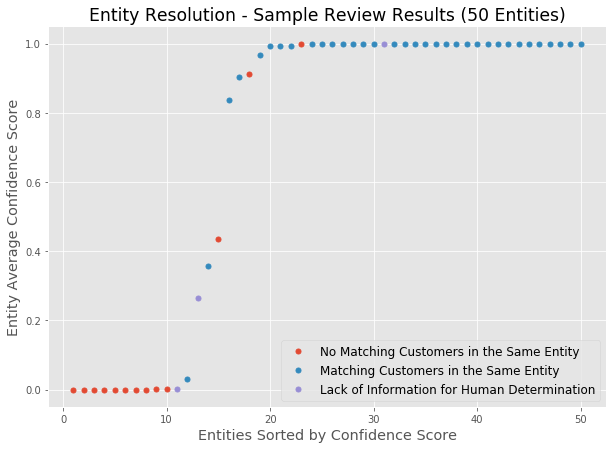

In [216]:
df = pd.DataFrame(dict(x=x,y=y,label=label))
groups = df.groupby('label')
plt.figure(figsize=(10,7))

for name,group in groups:
    plt.plot(group.y, group.x, marker='o', linestyle='', ms=5, label=name)

plt.legend(('No Matching Customers in the Same Entity','Matching Customers in the Same Entity','Lack of Information for Human Determination'), fontsize ='large')
plt.title('Entity Resolution - Sample Review Results (50 Entities)', fontsize = 'xx-large')
plt.ylabel('Entity Average Confidence Score', fontsize='x-large')
plt.xlabel('Entities Sorted by Confidence Score', fontsize='x-large')
plt.show()

In [182]:
y = [i+1 for i in range(50)]

In [138]:
zero = [i[0] for i in z if i[1]==1]

In [145]:
one = [i[0] for i in z if i[1]==0]

In [161]:
len(zero)

34

In [97]:
import matplotlib.pyplot as plt

In [98]:
import plotly.plotly as py

ModuleNotFoundError: No module named 'plotly'

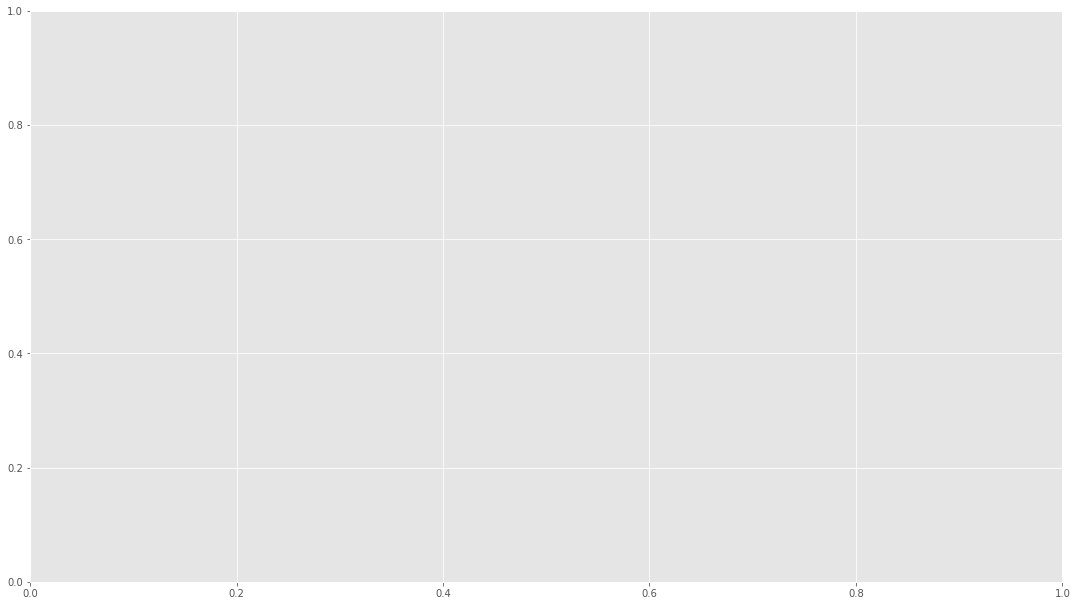

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5)

In [165]:
plt.figure(figsize=(20,10))
plt.scatter(one, color='r',marker='^')
plt.scatter(zero, color='b')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
####################### entities analysis ############################

In [22]:
df_alert2 = df_alert.groupby(['CUSTOMER_ID'])['ALERT_KEY'].count().to_frame().reset_index()

In [24]:
df_m = pd.merge(df_dupe, df_alert2, how='inner', on='CUSTOMER_ID')

In [2]:
df_m.shape

NameError: name 'df_m' is not defined

In [27]:
cluster_scope = df_m['Cluster ID']

In [28]:
df_dupe_scope = df_dupe[df_dupe['Cluster ID'].isin(cluster_scope)]

In [30]:
df_result = pd.merge(df_dupe_scope, df_alert2.reset_index(), how='left', on='CUSTOMER_ID')

In [31]:
df_result.count()

Unnamed: 0              10714
Cluster ID              10714
confidence_score        10714
CUSTOMER_ID             10714
ORGUNIT_CODE            10714
FIRST_NAME              10265
MIDDLE_NAMES             6664
LAST_NAME               10268
CUSTOMER_NAME           10714
DATE_OF_BIRTH            9267
ADDRESS                 10705
ZONE                    10714
POSTAL_CODE             10713
PRIME_BRANCH_ID          5478
CUSTOMER_STATUS_CODE    10714
City                    10714
State                   10714
SSN                     10281
DL                       5764
index                    4654
ALERT_KEY                4654
dtype: int64

In [33]:
df_result['Cluster ID'].nunique() # number of entities that have alerted customers

4618

In [34]:
df_dupe['Cluster ID'].nunique() # number of entities that

208204

In [35]:
4618/208204 #alerted entities/duped entities

0.02218016944919406

In [ ]:
##################### number of customers in entitiy analysis #########################

In [222]:
df_dupe.shape

(458499, 19)

In [40]:
entity1 = df_dupe.groupby('Cluster ID')['CUSTOMER_ID'].count().to_frame().reset_index()

In [2]:
entity1.shape


NameError: name 'entity1' is not defined

In [41]:
entity2 = entity1.groupby('CUSTOMER_ID')['Cluster ID'].count().to_frame().reset_index()

In [1]:
print(entity2.shape)


NameError: name 'entity2' is not defined

In [52]:
entity2['Cluster ID']

0     185584
1      16409
2       3646
3       1103
4        493
5        278
6        212
7        138
8         77
9         49
10        16
11        14
12        18
13        17
14        13
15         8
16        14
17         4
18         4
19         5
20         4
21         1
22         5
23         6
24         5
25         1
26         3
27         4
28         8
29         2
       ...  
40         4
41         2
42         2
43         2
44         1
45         3
46         1
47         3
48         1
49         1
50         1
51         1
52         1
53         1
54         1
55         1
56         1
57         2
58         1
59         1
60         1
61         1
62         2
63         1
64         1
65         1
66         1
67         1
68         1
69         1
Name: Cluster ID, Length: 70, dtype: int64

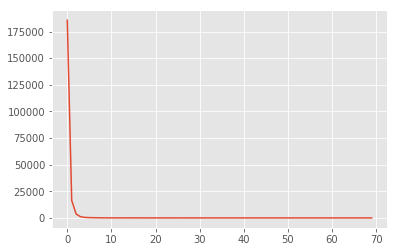

In [73]:
plt.plot(entity2['Cluster ID'])
#plt.yscale('logit')

In [230]:
entity2['CUSTOMER_ID'][:100]

0        2
1        3
2        4
3        5
4        6
5        7
6        8
7        9
8       10
9       11
10      12
11      13
12      14
13      15
14      16
15      17
16      18
17      19
18      20
19      21
20      22
21      23
22      24
23      25
24      26
25      27
26      28
27      29
28      30
29      31
      ... 
40      43
41      44
42      45
43      46
44      48
45      49
46      50
47      51
48      55
49      56
50      57
51      58
52      59
53      60
54      62
55      69
56      70
57      72
58      79
59      83
60      84
61      94
62     100
63     110
64     116
65     134
66     207
67     256
68     415
69    1991
Name: CUSTOMER_ID, Length: 70, dtype: int64

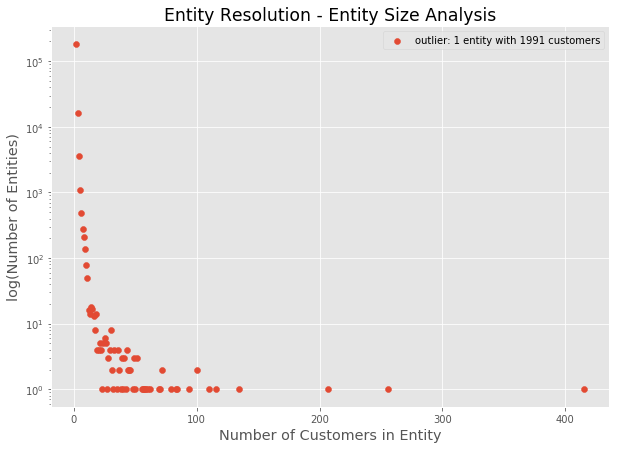

In [241]:


plt.figure(figsize=(10,7))

plt.scatter(entity2['CUSTOMER_ID'][:69], entity2['Cluster ID'][:69])
plt.yscale('log')
plt.title('Entity Resolution - Entity Size Analysis', fontsize = 'xx-large')
plt.ylabel('log(Number of Entities)', fontsize='x-large')
plt.xlabel('Number of Customers in Entity', fontsize='x-large')
plt.legend(('outlier: 1 entity with 1991 customers','a'))
plt.show()



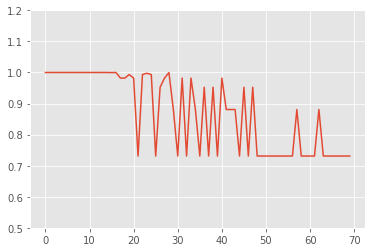

In [71]:
plt.plot(expit(entity2['Cluster ID']))
plt.ylim(0.5,1.2)
plt.show()

In [62]:
from scipy.special import logit, expit

In [59]:
import numpy as np
def logit(p):
    return np.log(p) - np.log(1-p)
def inv_logit(p):
    return np.exp(p) / (1+ np.exp(p))

In [76]:
inv_logit(0)

0.5

In [65]:
expit(entity2['Cluster ID'])

0    1.00
1    1.00
2    1.00
3    1.00
4    1.00
5    1.00
6    1.00
7    1.00
8    1.00
9    1.00
10   1.00
11   1.00
12   1.00
13   1.00
14   1.00
15   1.00
16   1.00
17   0.98
18   0.98
19   0.99
20   0.98
21   0.73
22   0.99
23   1.00
24   0.99
25   0.73
26   0.95
27   0.98
28   1.00
29   0.88
     ... 
40   0.98
41   0.88
42   0.88
43   0.88
44   0.73
45   0.95
46   0.73
47   0.95
48   0.73
49   0.73
50   0.73
51   0.73
52   0.73
53   0.73
54   0.73
55   0.73
56   0.73
57   0.88
58   0.73
59   0.73
60   0.73
61   0.73
62   0.88
63   0.73
64   0.73
65   0.73
66   0.73
67   0.73
68   0.73
69   0.73
Name: Cluster ID, Length: 70, dtype: float64

In [61]:
inv_logit(100)

1.0

In [262]:
file = 'E:\\Workspace\\Users\\Yue\\ER\\analysis\\entity_score.csv'

df_score = pd.read_csv(file, encoding="latin1", low_memory=False)

In [3]:
df_score.shape

NameError: name 'df_score' is not defined

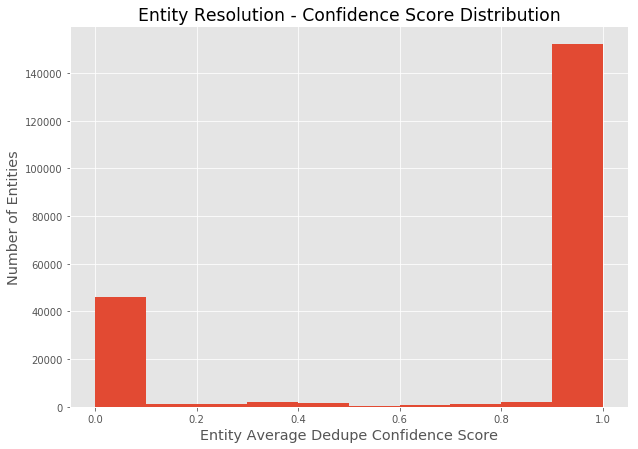

In [268]:





plt.figure(figsize=(10,7))

plt.hist(df_score['confidence_score'])
plt.title('Entity Resolution - Confidence Score Distribution', fontsize = 'xx-large')
plt.ylabel('Number of Entities', fontsize='x-large')
plt.xlabel('Entity Average Dedupe Confidence Score', fontsize='x-large')

plt.show()

